In [43]:
# Librerias
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import time
import locale
%matplotlib inline
import seaborn as sns
import matplotlib
import cvxopt as opt
from cvxopt import blas, solvers
import math
np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />

# Proyecto de Aplicación Profesional

## Optimización De Programas de Inversión para Intermediarios Financieros



### Integrantes:

### - Jazmín Calderón
### - Diana Chávez
### - Juan Antonio Flores




In [163]:
lista_M = ['https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Core-SP-500-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Core-SP-Mid-Cap-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Core-SP-Total-US-Stock-Market-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Expanded-Tech-Sector-ETF_fund.csv',
          'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Expanded-Tech-Software-Sector-ETF_fund.csv',
          'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-MSCI-ACWI-ETF_fund.csv',
          'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-MSCI-EAFE-ETF_fund.csv',
          'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-MSCI-Emerging-Markets-ETF_fund.csv',
          'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-MSCI-Japan-ETF_fund.csv',
          'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-MSCI-USA-ESG-Select-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Nasdaq-Biotechnology-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-North-American-Tech-Multimedia-Networking-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-PHLX-Semiconductor-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Preferred-and-Income-Securities-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Russell-1000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Russell-1000-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Russell-1000-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-Russell-2000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-SP-500-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-SP-500-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Basic-Materials-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Consumer-Services-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Energy-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Financial-Services-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Financials-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Healthcare-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Home-Construction-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Industrials-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Medical-Devices-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Pharmaceuticals-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Technology-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_M/iShares-US-Telecommunications-ETF_fund.csv']
         

In [164]:
len(lista_M)

32

## Críterio #1 Portafolio de Markowitz

## Importar datos de ETF'S

In [165]:
def rend (i):
    fecha=[]

    ETF = pd.read_csv(lista_M[i], skiprows = [0,1,2,3])
  
    ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].replace('--',"0")
    ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].astype(float)
    ETF=ETF['Monthly Total (NAV) Return']
    #ETF=ETF.iloc[212:224]

    #tabla=pd.DataFrame(columns=['Monthly Total (NAV) Return'])
    #tabla.index.name = "ETF"
    #tabla['Month End Date'] = fecha
    #x=ETF['Monthly Total (NAV) Return']
    #tabla['Monthly Total (NAV) Return']=ETF
    #tabla['Month End Date'] = pd.to_datetime(tabla['Month End Date'], format='%b %d, %Y')
   
    
    
    #grupo=grupo.iloc[212:224]
    return(ETF)

In [201]:
ren=[]
for i in range(32):
    ren.append(1+i)


In [167]:
r0= rend(0)
r1= rend(1)
r2= rend(2)
r3= rend(3)
r4= rend(4)
r5= rend(5)
r6= rend(6)
r7= rend(7)
r8= rend(8)
r9= rend(9)
r10= rend(10)
r11= rend(11)
r12= rend(12)
r13= rend(13)
r14= rend(14)
r15= rend(15)
r16= rend(16)
r17= rend(17)
r18= rend(18)
r19= rend(19)
r20= rend(20)
r21= rend(21)
r22= rend(22)
r23= rend(23)
r24= rend(24)
r25= rend(25)
r26= rend(26)
r27= rend(27)
r28= rend(28)
r29= rend(29)
r30= rend(30)
r31= rend(31)

In [184]:
df_rend = pd.DataFrame({'Core SP 500': r0,'Core SP Mid Cap': r1,
                  'Core SP Total US Stock Market': r2,'Expanded Tech Sector': r3,
                  'Expanded Tech Software Sector': r4,'MSCI ACWI': r5,
                  'MSCI EAFE': r6,'MSCI Emerging Markets': r7, 'MSCI Japan': r8,
                  'MSCI USA ESG Select': r9, 'Nasdaq Biotechnology': r10, 'NorthAmerican Tech Multimedia Networking': r11,
                  'PHLX Semiconductor': r12, 'Preferred and Income Securities': r13, 'Russell 1000': r14,
                  'Russell 1000 Growth': r15,'Russell 1000 Value': r16, 'Russell 2000': r17,
                  'SP 500 Growth': r18,'US Basic Materials': r19,
                  'US Consumer Services': r20, 'SP 500 Value': r21, 'US Energy': r22,
                  'US Financial Services': r23, 'US Financials': r24, 'US Healthcare': r25, 'Home Construction': r26,
                  'US Industrials': r27, 'US Medical Devices': r28, 'US Pharmaceuticals': r29,
                  'US Technology': r30,'US Telecommunications': r31},index=ren)

df_rend = df_rend[0:11]
pd.set_option('display.max_columns', 32)
df_rend

,Core SP 500,Core SP Mid Cap,Core SP Total US Stock Market,Expanded Tech Sector,Expanded Tech Software Sector,Home Construction,MSCI ACWI,MSCI EAFE,MSCI Emerging Markets,MSCI Japan,MSCI USA ESG Select,Nasdaq Biotechnology,NorthAmerican Tech Multimedia Networking,PHLX Semiconductor,Preferred and Income Securities,Russell 1000,Russell 1000 Growth,Russell 1000 Value,Russell 2000,SP 500 Growth,SP 500 Value,US Basic Materials,US Consumer Services,US Energy,US Financial Services,US Financials,US Healthcare,US Industrials,US Medical Devices,US Pharmaceuticals,US Technology,US Telecommunications
1,-3.25,-1.86,-3.14,-3.46,-4.30,-11.96,5.89,1.35,5.17,0.55,-2.31,-2.67,-5.36,-2.34,-0.36,-3.05,-1.99,-4.19,-3.71,-1.31,-3.83,-5.21,4.17,8.02,-12.81,-10.65,-2.15,-2.43,1.02,-1.93,-3.98,-10.62
2,-0.44,-1.03,-0.46,0.88,0.61,9.37,2.00,-1.02,-5.21,-4.05,0.14,-0.33,-3.43,-0.84,-5.81,-0.69,-0.64,-0.77,0.42,-0.41,-0.79,-0.49,-2.61,-2.04,-3.56,-2.19,-4.18,2.28,-1.03,-4.02,0.43,-0.32
3,4.85,7.68,5.01,7.23,5.11,0.75,-7.87,5.38,9.02,7.07,3.65,2.29,10.56,7.42,6.81,5.05,5.24,4.85,4.19,5.93,4.29,3.69,7.56,11.01,6.83,6.07,1.42,2.87,-0.43,2.47,7.29,7.95
4,1.29,5.29,1.71,6.28,9.78,-14.06,-2.90,0.91,3.06,2.43,2.02,2.34,7.49,8.46,-0.88,1.83,3.64,-0.17,4.61,2.36,1.53,0.13,7.34,3.97,-6.39,-4.76,1.95,2.98,3.41,2.64,6.23,6.57
5,-8.43,-7.03,-8.29,-9.56,-8.62,-17.64,-1.94,-8.11,-9.09,-6.74,-8.05,-2.99,-12.03,-11.35,-9.74,-8.30,-7.21,-9.57,-7.69,-5.91,-10.09,-11.20,-1.29,2.39,-19.85,-17.31,-4.49,-10.79,-3.13,-4.11,-9.40,-9.83
6,-0.84,-1.85,-0.82,-0.71,0.38,8.43,-12.52,-3.27,-4.65,-3.43,0.41,15.56,1.23,-8.26,-4.68,-1.15,-1.92,-0.36,3.71,-2.73,0.41,1.34,-7.82,-14.41,9.63,6.47,5.77,1.30,4.84,4.46,-1.35,-3.40
7,1.44,1.70,1.55,2.14,3.73,7.00,-19.64,-4.06,-7.05,-3.97,1.37,-3.48,2.25,4.30,0.50,1.37,1.07,1.70,3.61,1.53,5.69,1.34,-4.37,-0.37,-0.74,0.04,1.96,1.62,4.63,2.61,2.30,2.53
8,-8.89,-10.70,-8.97,-13.79,-11.19,7.84,-6.63,-14.35,-15.55,-11.19,-6.90,-5.55,-21.59,-16.90,-26.12,-9.51,-11.57,-7.33,-7.94,-10.15,-8.32,-7.48,-22.49,-12.40,-1.82,-4.07,-6.27,-12.79,-7.61,-5.01,-13.04,-14.30
9,-16.76,-21.68,-17.30,-18.36,-22.46,-30.20,3.61,-20.11,-25.71,-14.83,-17.23,-12.15,-19.10,-17.80,5.56,-17.42,-17.60,-17.28,-20.76,-16.51,-16.74,-17.06,-25.87,-19.27,-17.98,-21.47,-12.57,-20.62,-21.26,-13.04,-17.19,-20.81
10,-7.17,-9.23,-7.49,-11.29,-8.46,-18.08,NaN,-5.23,-8.87,-1.14,-8.38,-8.20,-9.94,-18.91,-7.62,-7.54,-7.94,-7.16,-11.78,-5.53,-9.00,-8.98,-14.64,-1.78,-18.26,-16.44,-7.42,-7.05,-16.34,-1.88,-12.04,3.05


# Markowitz

In [186]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
#quandl.ApiConfig.api_key = 'INSERT YOUR API KEY HERE'
selected = ['Core SP 500','Core SP Mid Cap',
                  'Core SP Total US Stock Market','Expanded Tech Sector',
                  'Expanded Tech Software Sector','MSCI ACWI',
                  'MSCI EAFE','MSCI Emerging Markets', 'MSCI Japan',
                  'MSCI USA ESG Select', 'Nasdaq Biotechnology', 'NorthAmerican Tech Multimedia Networking',
                  'PHLX Semiconductor', 'Preferred and Income Securities', 'Russell 1000',
                  'Russell 1000 Growth','Russell 1000 Value', 'Russell 2000',
                  'SP 500 Growth','US Basic Materials','US Consumer Services', 'SP 500 Value', 'US Energy',
                  'US Financial Services', 'US Financials', 'US Healthcare', 'Home Construction',
                  'US Industrials', 'US Medical Devices', 'US Pharmaceuticals','US Technology','US Telecommunications']
#data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        #qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        #date = { 'gte': '2014-1-1', 'lte': '2016-12-31' }, paginate=True)

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
#clean = data.set_index('date')
#table = clean.pivot(columns='ticker')

In [187]:
# calculate daily and annual returns of the stocks
returns_daily = df_rend
returns_annual = returns_daily.mean() * 12

# get daily and covariance of returns of the stock
cov_daily = df_rend.cov()
cov_annual = cov_daily * 12

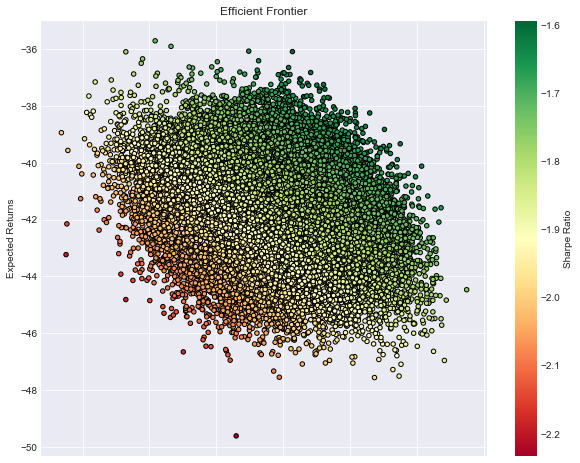

In [197]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = (returns- 2.39)/ volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

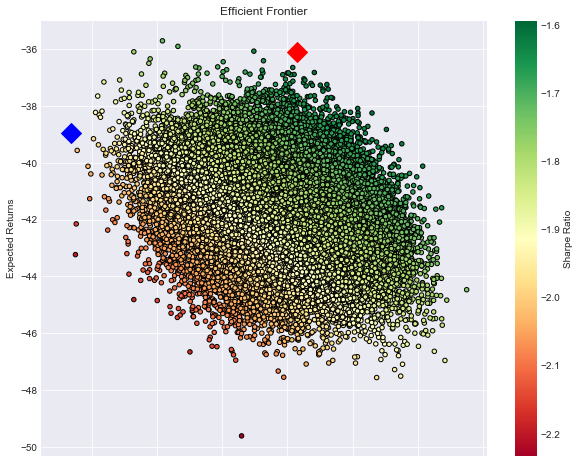

In [198]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [199]:
print(min_variance_port.T)


                                                     17983
Returns                                         -38.938848
Volatility                                       20.683076
Sharpe Ratio                                     -1.998196
Core SP 500 Weight                                0.027815
Core SP Mid Cap Weight                            0.022344
Core SP Total US Stock Market Weight              0.064484
Expanded Tech Sector Weight                       0.003748
Expanded Tech Software Sector Weight              0.018357
MSCI ACWI Weight                                  0.013804
MSCI EAFE Weight                                  0.067573
MSCI Emerging Markets Weight                      0.006851
MSCI Japan Weight                                 0.019555
MSCI USA ESG Select Weight                        0.038672
Nasdaq Biotechnology Weight                       0.067051
NorthAmerican Tech Multimedia Networking Weight   0.046425
PHLX Semiconductor Weight                         0.0126

In [200]:
print(sharpe_portfolio.T)

                                                      1963
Returns                                         -36.082465
Volatility                                       24.139763
Sharpe Ratio                                     -1.593738
Core SP 500 Weight                                0.013933
Core SP Mid Cap Weight                            0.047979
Core SP Total US Stock Market Weight              0.033390
Expanded Tech Sector Weight                       0.042643
Expanded Tech Software Sector Weight              0.072411
MSCI ACWI Weight                                  0.003220
MSCI EAFE Weight                                  0.017133
MSCI Emerging Markets Weight                      0.049593
MSCI Japan Weight                                 0.016593
MSCI USA ESG Select Weight                        0.030975
Nasdaq Biotechnology Weight                       0.007098
NorthAmerican Tech Multimedia Networking Weight   0.043459
PHLX Semiconductor Weight                         0.0067